In [1]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv("bank.csv")

In [4]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_copy=bank.copy()

In [7]:
bank_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
bank_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
bank_copy.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
#Checking out the statistical parameters
bank_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#Checking out the categories and their respective counts in each feature
print("Job:",bank_copy.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_copy.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_copy.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_copy.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_copy.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_copy.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_copy.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_copy.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_copy.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_copy.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_copy.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

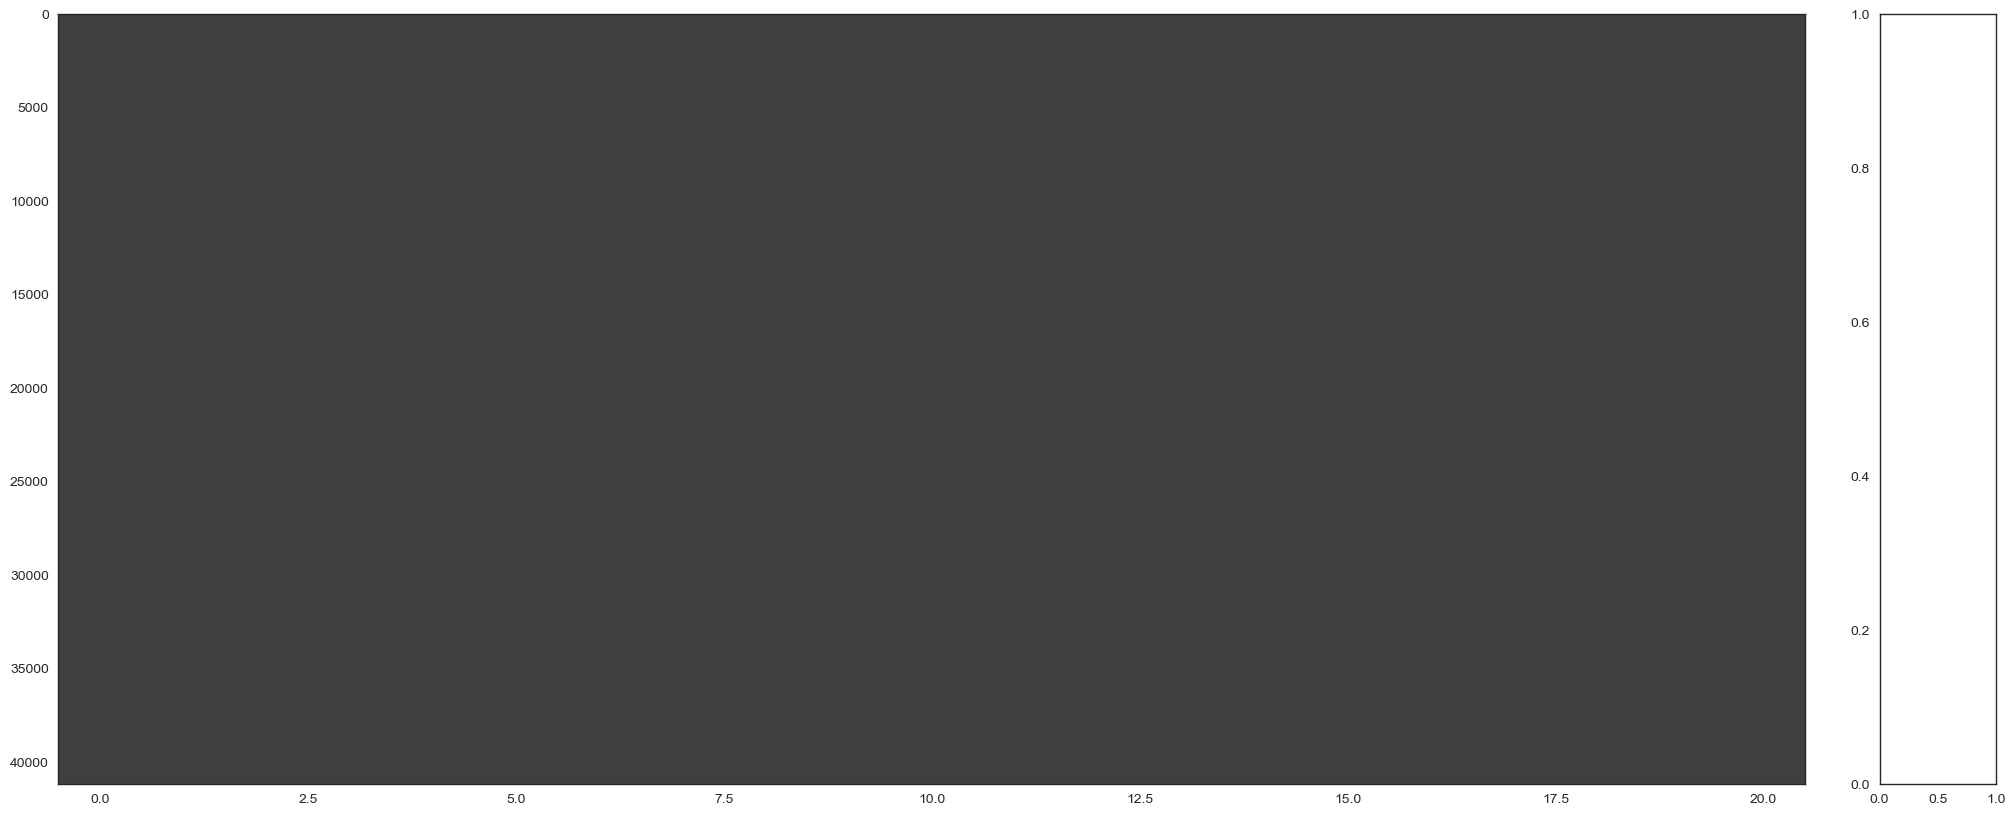

In [13]:
import missingno as msno 
msno.matrix(bank_copy)

In [14]:
print('Data columns with null values:',bank_copy.isnull().sum(), sep = '\n')

Data columns with null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [15]:
import plotly.express as px

fig = px.box(bank_copy, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [16]:
fig = px.scatter(bank_copy, x="campaign", y="duration", color="y")
fig.show()

<BarContainer object of 41188 artists>

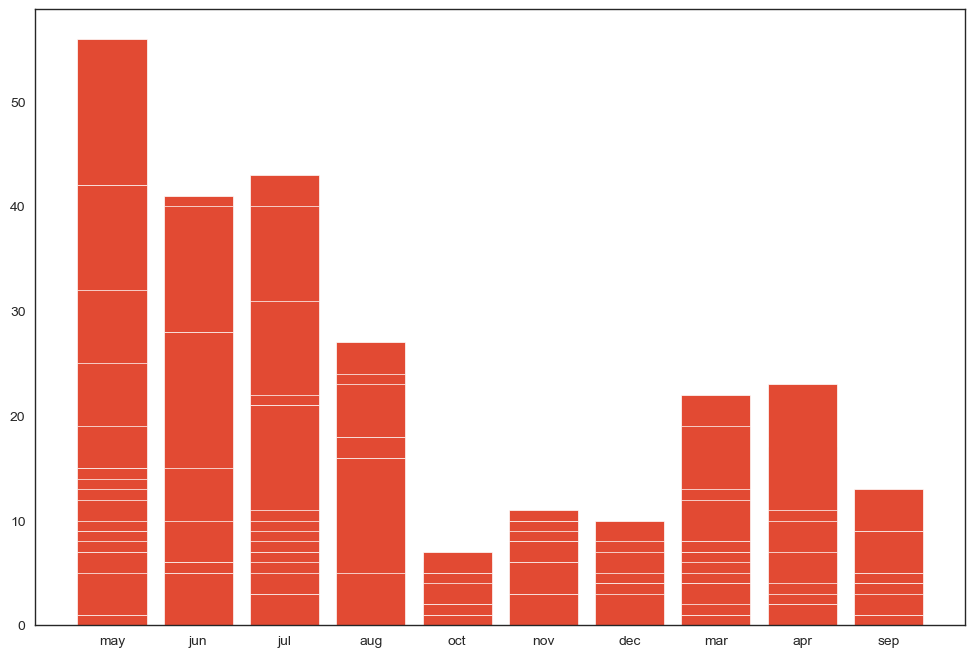

In [17]:
plt.bar(bank_copy['month'], bank_copy['campaign'])

In [ ]:
plt.subplot(231)
sns.distplot(bank_copy['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(bank_copy['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(bank_copy['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(bank_copy['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(bank_copy['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

<Axes: xlabel='cons.price.idx', ylabel='marital'>

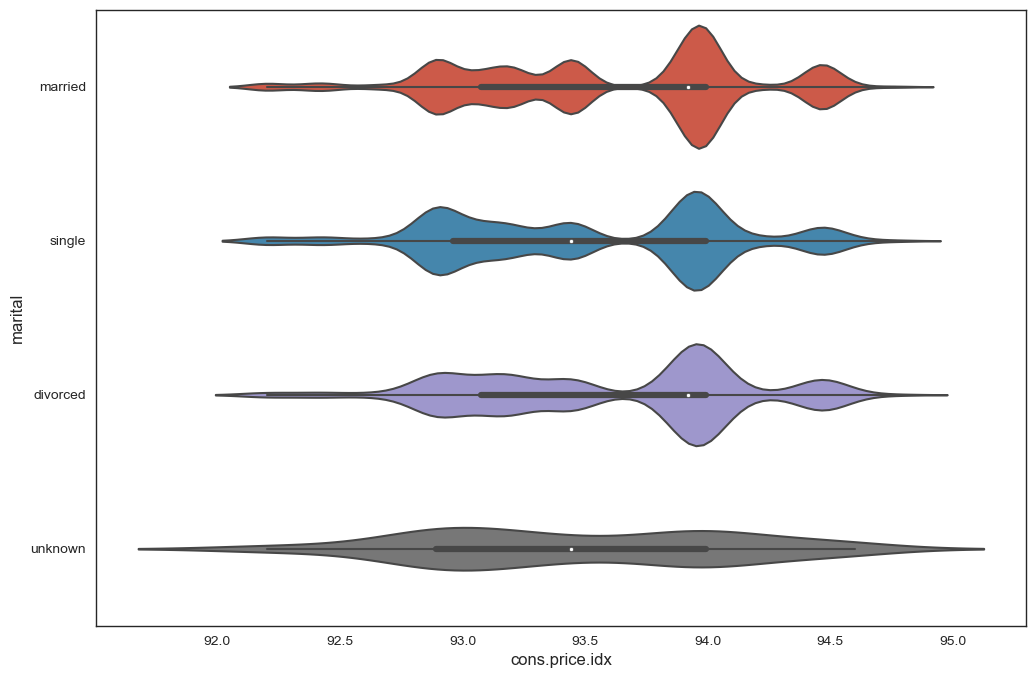

In [18]:
sns.violinplot( y=bank_copy["marital"], x=bank_copy["cons.price.idx"] )

<Axes: xlabel='education'>

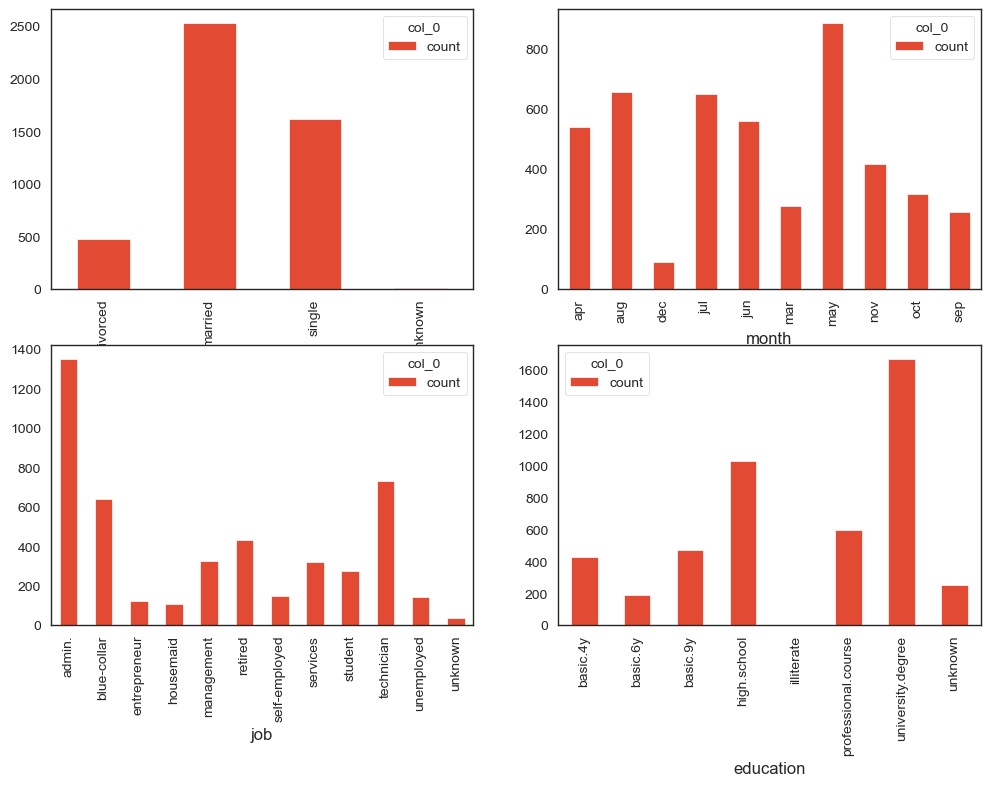

In [19]:
bank_yes = bank_copy[bank_copy['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])    

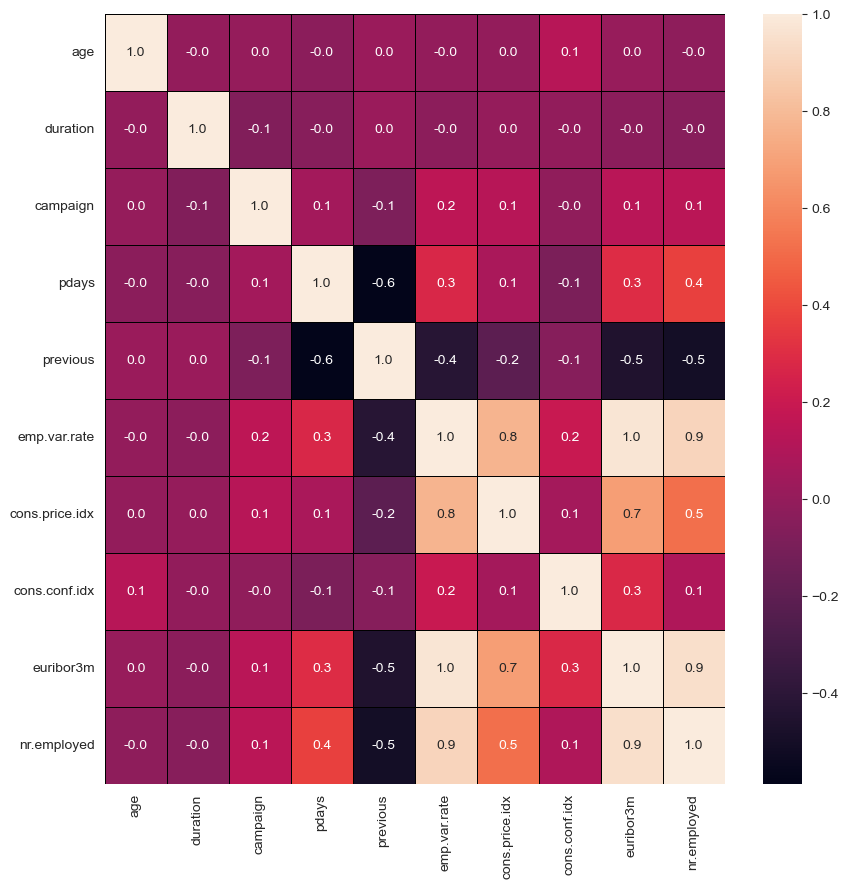

In [20]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_copy.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Text(0.5, 1.0, 'No of employees')

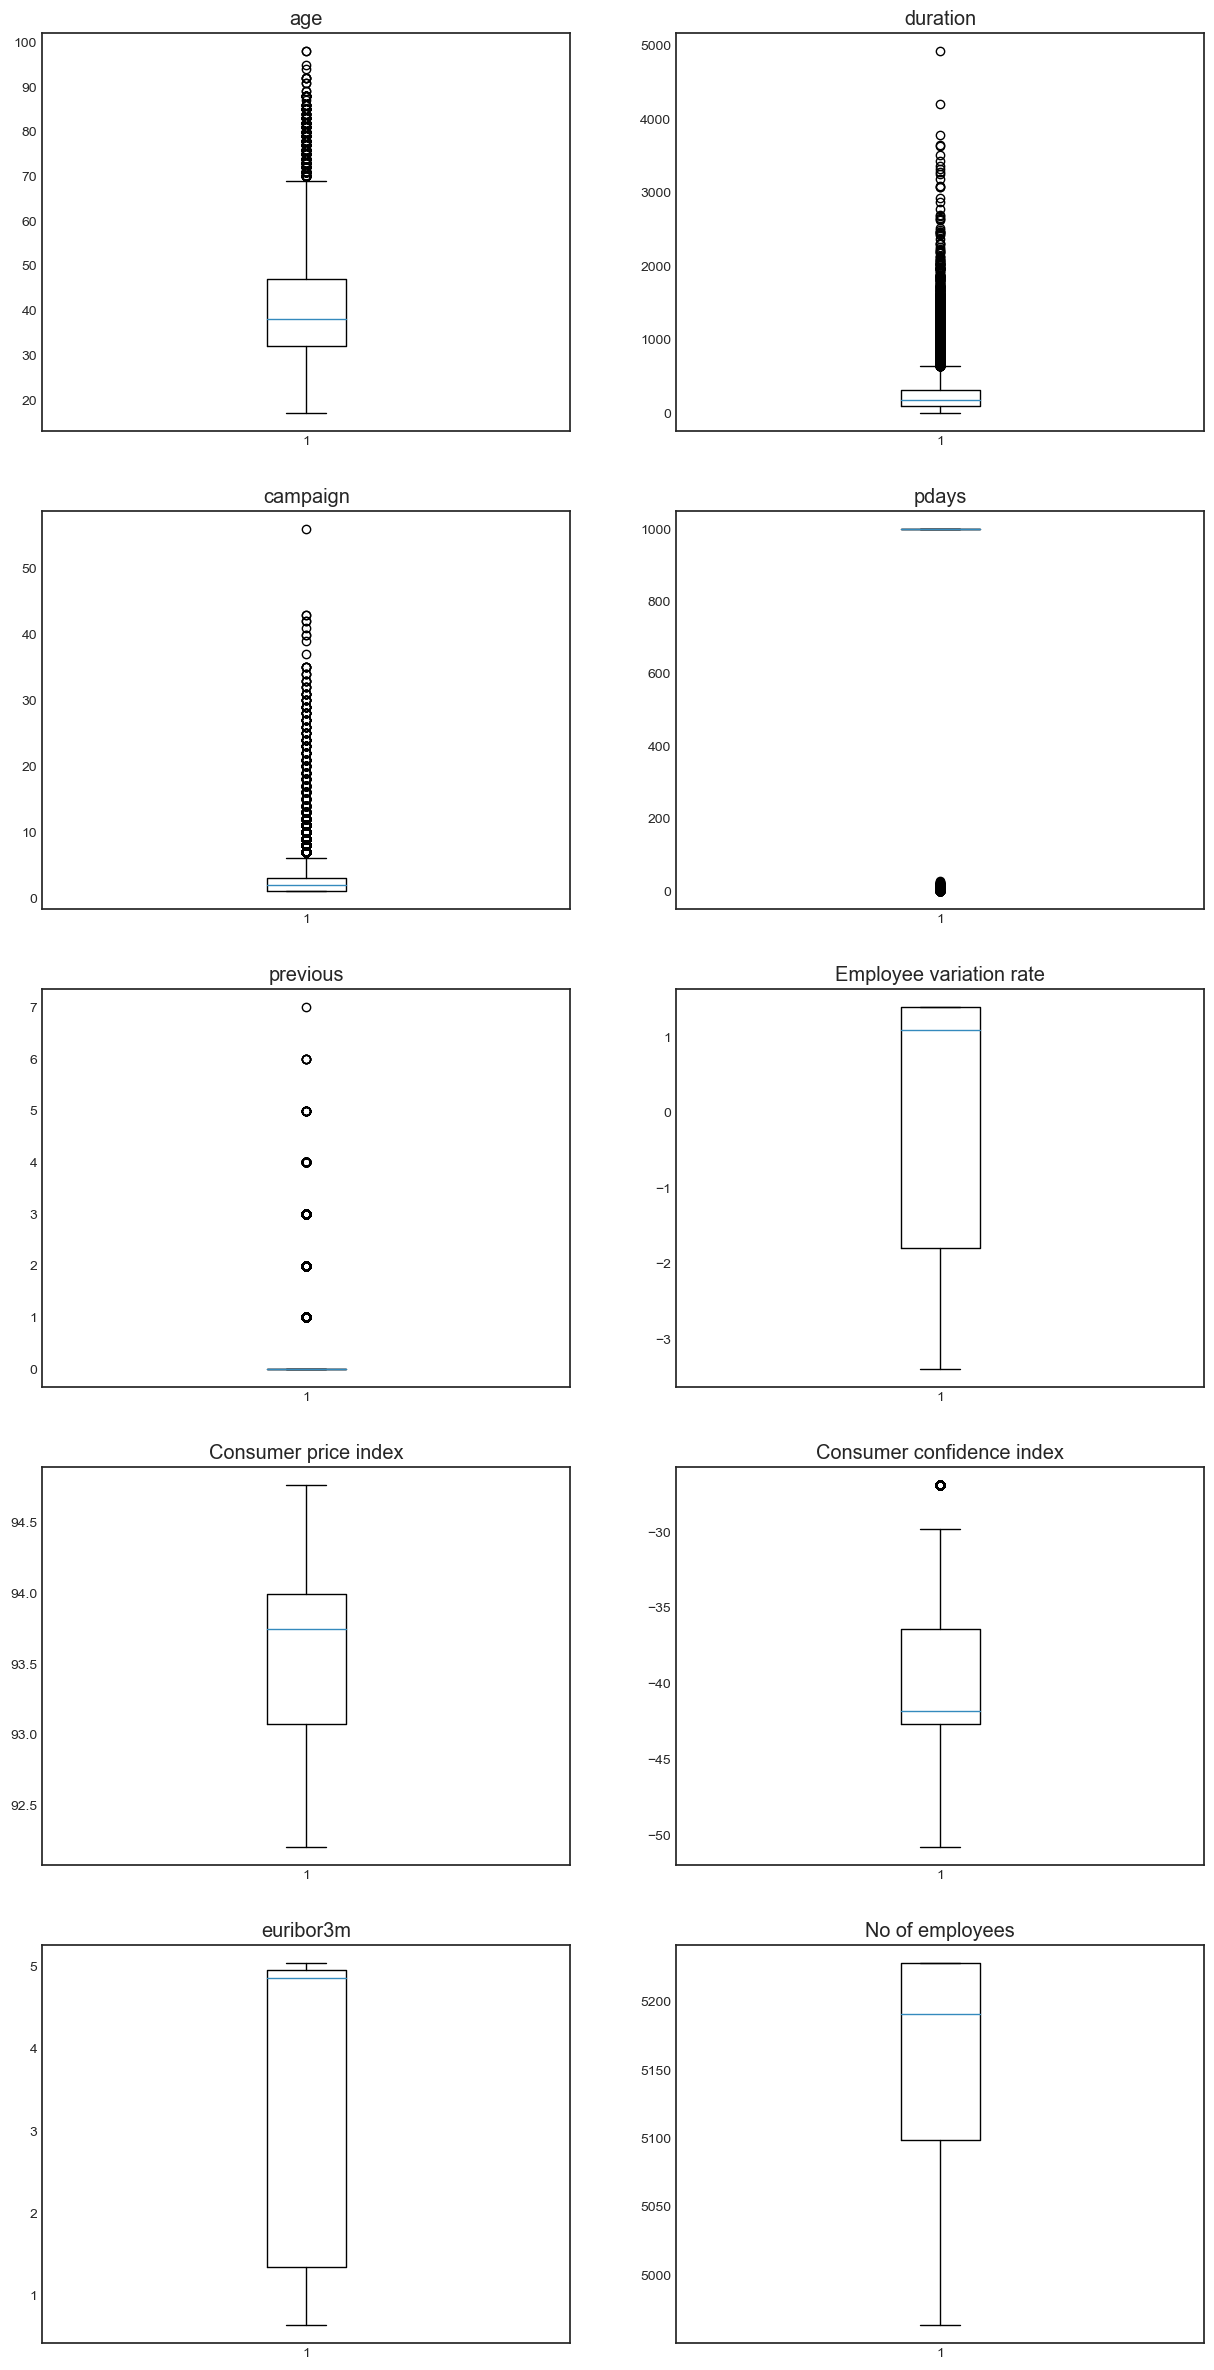

In [21]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')

In [22]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

Text(0.5, 1.0, 'campaign')

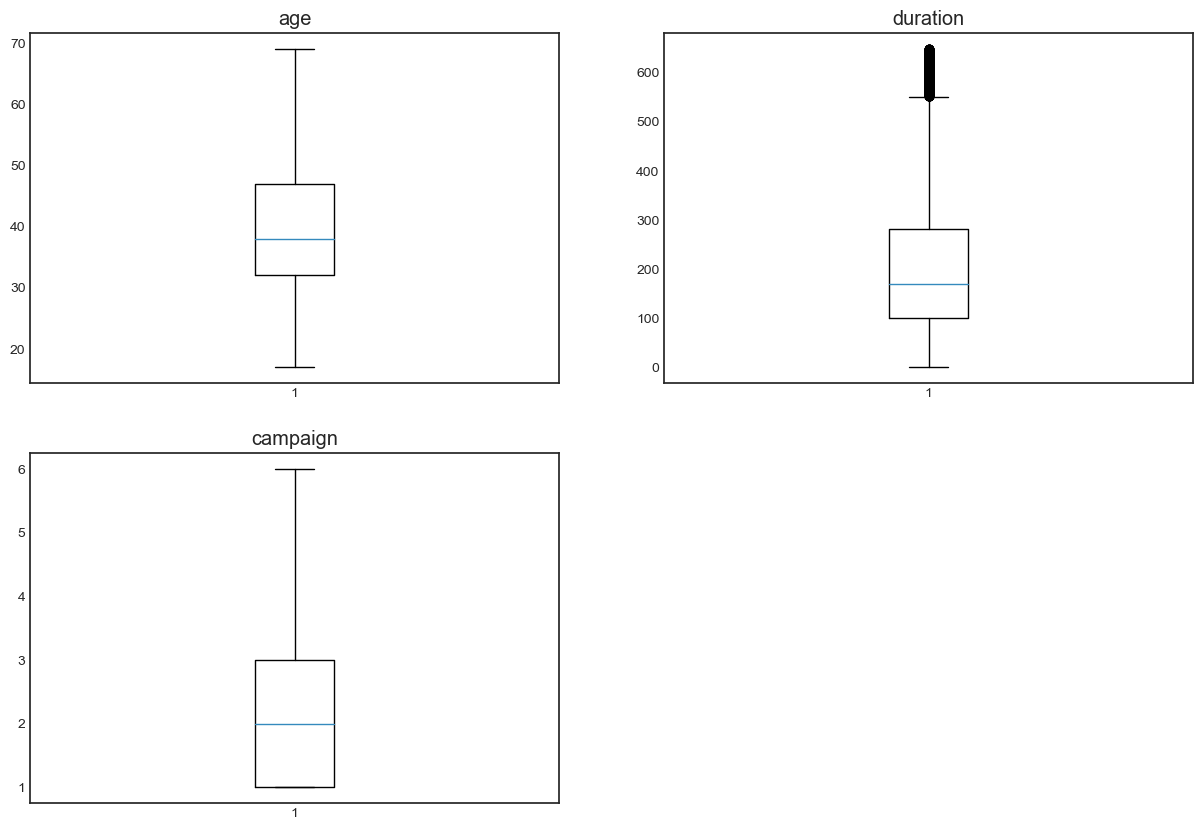

In [23]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

In [51]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

middle.school          10688
university.degree      10559
high.school             8287
professional.course     4554
unknown                 1459
illiterate                14
Name: education, dtype: int64

In [52]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 

In [53]:
bank_features.loc[:, ['month', 'day_of_week']].head()

,month,day_of_week
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [54]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [55]:
bank_features['pdays'].value_counts()

0     34305
3       367
6       343
4       105
9        54
2        51
12       50
7        48
10       44
5        38
13       28
1        23
11       22
15       20
14       15
8        14
16       10
17        8
18        6
22        3
21        2
25        1
26        1
27        1
20        1
19        1
Name: pdays, dtype: int64

In [56]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [57]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [58]:
bank_features.loc[:,['housing','default','loan','y']].head()

,housing,default,loan,y
0,0,0,0,0
1,0,-1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0


In [59]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [60]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

,dummy_telephone,dummy_nonexistent,dummy_success
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [61]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

In [62]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)

In [63]:
bank_features.loc[:,['job','education']].head()

,job,education
0,899,10688
1,3456,8287
2,3456,8287
3,9110,10688
4,3456,8287


In [64]:
bank_features.groupby(['marital'])['y'].mean()

marital
divorced    0.063988
married     0.069050
single      0.113226
unknown     0.129032
Name: y, dtype: float64

In [65]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

In [66]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [67]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [68]:
bank_features.marital_ordinal.value_counts()

1    21506
2    10086
0     3907
3       62
Name: marital_ordinal, dtype: int64

In [69]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [70]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital_ordinal,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,899,10688,0,0,0,5,2,0,1,1,0,1,1.694643,0.383434,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
1,3456,8287,-1,0,0,5,2,0,1,1,0,1,1.797965,-0.413575,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
2,3456,8287,0,1,0,5,2,0,1,1,0,1,-0.268482,0.134369,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
3,9110,10688,0,0,0,5,2,0,1,1,0,1,0.041485,-0.399342,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
4,3456,8287,0,0,1,5,2,0,1,1,0,1,1.694643,0.710777,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002


In [71]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

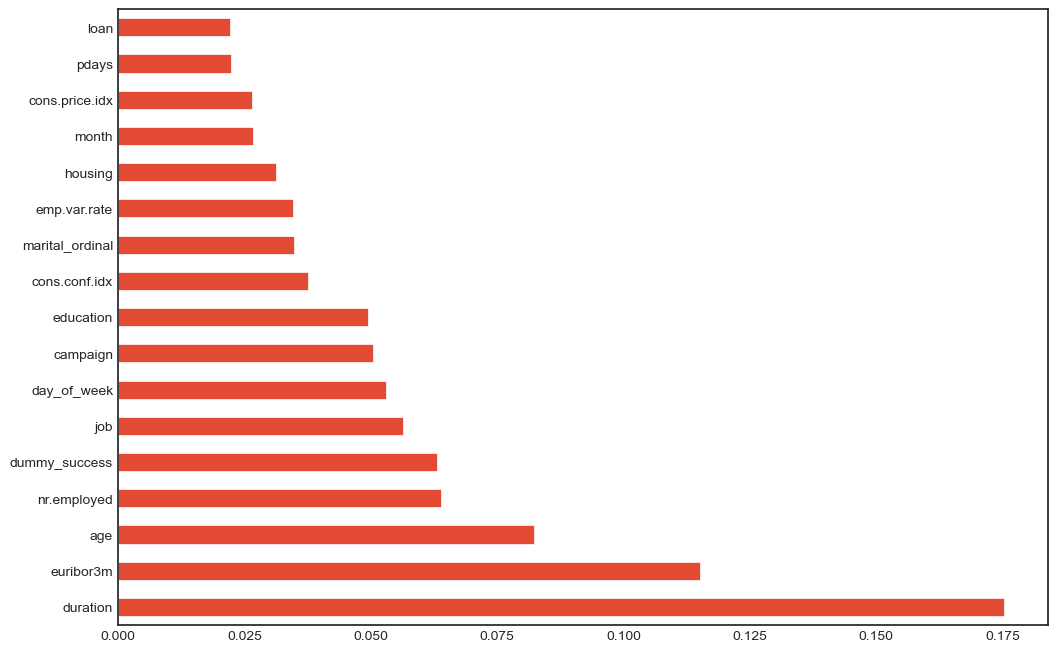

In [72]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [73]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28448, 15)
Input Test: (7113, 15)
Output Training: (28448,)
Output Test: (7113,)


In [74]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8781237696356271
Decision Tree Test Accuracy: 0.6386130834713978
KNN Test Accuracy: 0.8746929484882704
SVC Test Accuracy: 0.9188718011316903
Naive Bayes Test Accuracy: 0.8191811374646486


In [75]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.18420699693267145, random_state=0)
The mean accuracy of the model is: 0.9246450161675804


In [76]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

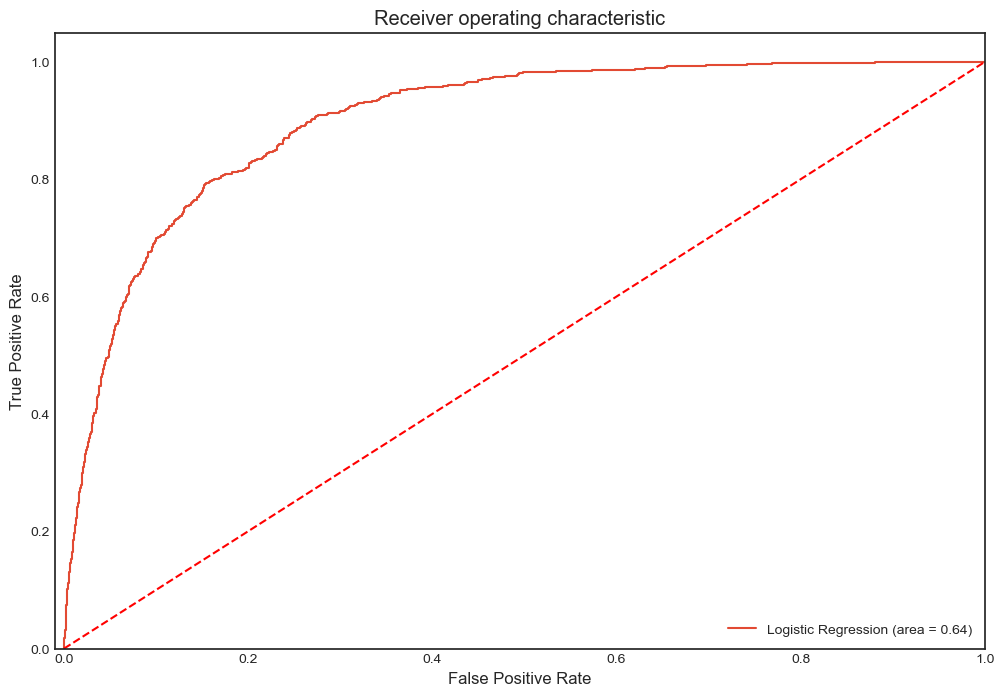

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9191620975678335
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6538
           1       0.00      0.00      0.00       575

    accuracy                           0.92      7113
   macro avg       0.46      0.50      0.48      7113
weighted avg       0.84      0.92      0.88      7113

